In [10]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
DATA_PATH = '/Users/dafneculha/Desktop/dataviz-data/data/processed/transports_v2.parquet'
transport_data = pd.read_parquet(DATA_PATH)

In [3]:
transport_df = pd.DataFrame(transport_data)

In [4]:
transport_df.head()

,trip_id,product_id,line_text,transport_type,stop_id,arrival_time,departure_time,mean_arrival_delay,mean_departure_delay,median_arrival_delay,median_departure_delay,std_arrival_delay,std_departure_delay,n_arrival_delay,n_departure_delay,n_cancelled,n_through_trip,n_additional_trip,n_entries
0,80:06____:17171:000,Train,RB,RB,8500090,14:50:00,None,293.939394,NaN,120.0,NaN,388.229414,NaN,68,0,4,0,0,104
1,80:06____:17261:000,Train,RB,RB,8500090,None,15:53:00,NaN,61.621622,NaN,0.0,NaN,129.218022,0,9,1,0,0,104
2,80:800693:3053:000,Train,IRE3,IRE,8503424,11:58:00,12:00:00,151.539474,127.605263,41.0,19.0,627.797068,622.499501,60,73,2,0,0,78
4,80:sbg034:14004,Bus,Bus7349,B,8573327,09:07:00,None,2.400000,NaN,0.0,NaN,29.443320,NaN,5,0,0,0,0,100
6,80:sbg034:55413,Bus,Bus7349,B,8503474,00:19:00,00:20:00,138.000000,96.000000,180.0,120.0,107.025910,84.852814,70,68,0,0,0,100


In [7]:
unique_product_ids = transport_df['product_id'].unique()

In [8]:
unique_product_ids

array(['Train', 'Bus', 'Rack Railway', 'Metro', 'Boat', 'Tram'],
      dtype=object)

In [7]:
len(unique_product_ids)

6

In [79]:
df = transport_data[['trip_id', 'product_id', 'departure_time', 'arrival_time']] \
    .drop_duplicates()

In [80]:
df.head()

,trip_id,product_id,departure_time,arrival_time
0,80:06____:17171:000,Train,None,14:50:00
1,80:06____:17261:000,Train,15:53:00,None
2,80:800693:3053:000,Train,12:00:00,11:58:00
4,80:sbg034:14004,Bus,None,09:07:00
6,80:sbg034:55413,Bus,00:20:00,00:19:00


In [81]:
grouped_products = df.groupby('product_id')

In [82]:
grouped_products.head()

,trip_id,product_id,departure_time,arrival_time
0,80:06____:17171:000,Train,None,14:50:00
1,80:06____:17261:000,Train,15:53:00,None
2,80:800693:3053:000,Train,12:00:00,11:58:00
4,80:sbg034:14004,Bus,None,09:07:00
6,80:sbg034:55413,Bus,00:20:00,00:19:00
8,80:sbg034:58127,Bus,08:20:00,08:20:00
9,80:sbg034:76787,Bus,18:52:00,18:52:00
10,80:sbg034:83925,Bus,11:30:00,11:30:00
12,85:11:10006:004,Train,14:05:00,14:04:00
14,85:11:10113:001,Train,10:26:00,10:25:00


In [83]:
dataframes_by_product = {product_id: group for product_id, group in grouped_products}


In [94]:
train_df = dataframes_by_product[unique_product_ids[0]]
bus_df = dataframes_by_product[unique_product_ids[1]]
rackrw_df = dataframes_by_product[unique_product_ids[2]]
metro_df = dataframes_by_product[unique_product_ids[2]]
boat_df = dataframes_by_product[unique_product_ids[4]]
tram_df = dataframes_by_product[unique_product_ids[5]]

In [95]:
df_train = train_df[['trip_id', 'departure_time']]\
    .groupby('departure_time')\
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('departure_time', ascending=True)

In [96]:
df_train.head()

,count
departure_time,
00:00:00,233
00:01:00,215
00:02:00,226
00:03:00,196
00:04:00,214


In [ ]:
df_train.index = pd.to_datetime(df_train.index)

In [ ]:
df_resampled = df_train.resample('15T').sum()

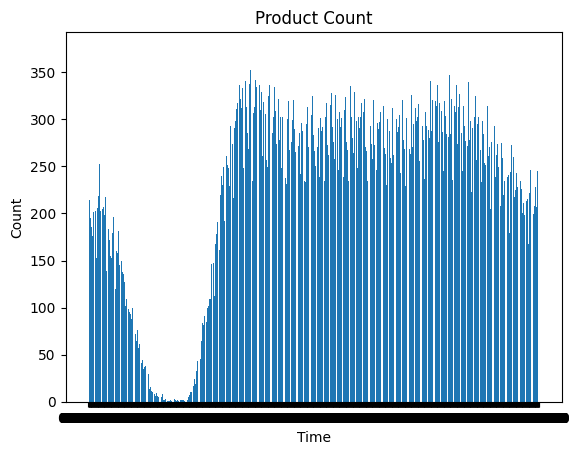

In [97]:
plt.bar(df_train.index, df_train['count'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Product Count')

# Show the plot
plt.show()

In [98]:
df_train_json = df_train.reset_index().to_json(orient='records')

with open('df_train_json', 'w') as f:
    f.write(df_train_json)

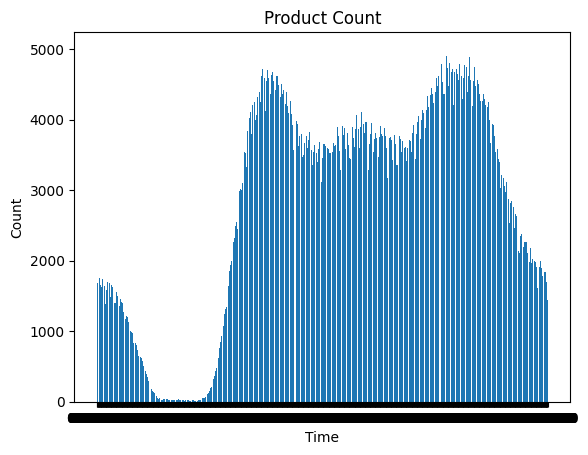

In [99]:
df_bus = bus_df[['trip_id', 'departure_time']]\
    .groupby('departure_time')\
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('departure_time', ascending=True)

plt.bar(df_bus.index, df_bus['count'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Product Count')

# Show the plot
plt.show()

df_bus_json = df_bus.reset_index().to_json(orient='records')

with open('df_bus_json', 'w') as f:
    f.write(df_bus_json)

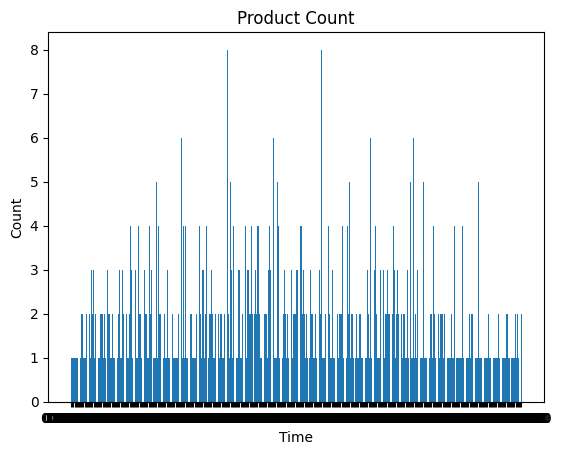

In [102]:
df_boat = boat_df[['trip_id', 'departure_time']]\
    .groupby('departure_time')\
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('departure_time', ascending=True)

plt.bar(df_boat.index, df_boat['count'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Product Count')

# Show the plot
plt.show()

df_boat_json = df_boat.reset_index().to_json(orient='records')

with open('df_boat_json', 'w') as f:
    f.write(df_boat_json)

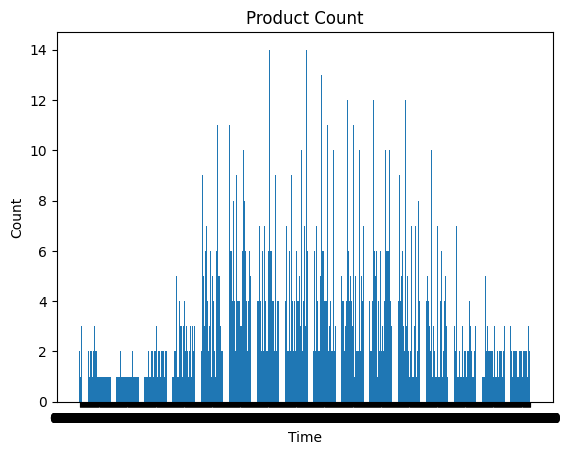

In [103]:
df_metro = metro_df[['trip_id', 'departure_time']]\
    .groupby('departure_time')\
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('departure_time', ascending=True)

plt.bar(df_metro.index, df_metro['count'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Product Count')

# Show the plot
plt.show()

df_metro_json = df_metro.reset_index().to_json(orient='records')

with open('df_metro_json', 'w') as f:
    f.write(df_metro_json)

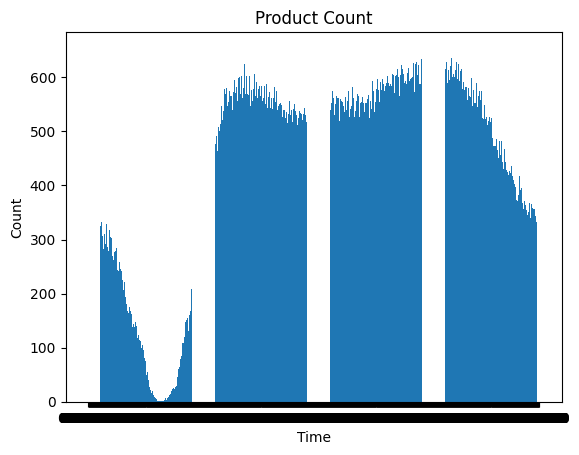

In [104]:
df_tram = tram_df[['trip_id', 'departure_time']]\
    .groupby('departure_time')\
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('departure_time', ascending=True)

plt.bar(df_tram.index, df_tram['count'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Product Count')

# Show the plot
plt.show()

df_tram_json = df_tram.reset_index().to_json(orient='records')

with open('df_tram_json', 'w') as f:
    f.write(df_tram_json)

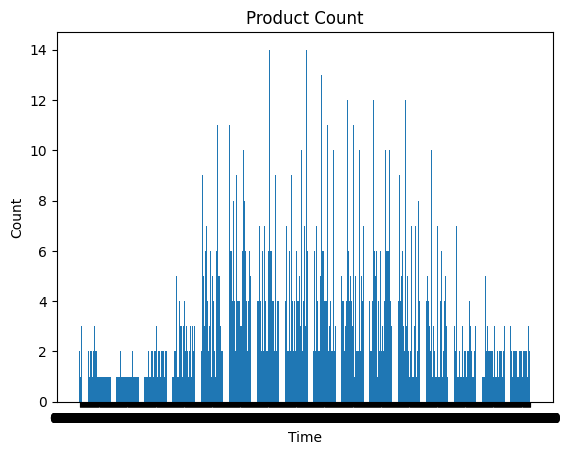

In [105]:
df_rackrw = rackrw_df[['trip_id', 'departure_time']]\
    .groupby('departure_time')\
    .count() \
    .rename(columns={'trip_id': 'count'}) \
    .sort_values('departure_time', ascending=True)

plt.bar(df_rackrw.index, df_rackrw['count'])

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Product Count')

# Show the plot
plt.show()

df_rackrw_json = df_rackrw.reset_index().to_json(orient='records')

with open('df_rackrw_json.json', 'w') as f:
    f.write(df_rackrw_json)